In [2]:
def calc_max_min(arr,N):
    max = arr[0]
    min = arr[0]
    for i in range(N):
        if(arr[i]<min):
            min = arr[i]
            
        if(arr[i]>max):
            max = arr[i]
    
    return min,max

In [3]:
%%file C_max_min.c

#include <stdio.h>

float C_max_min(float* arreglo,long int N){
    float min=arreglo[0], max=arreglo[0];
    for(int i=0; i<N;i++){
        if(arreglo[i]<min){
            min = arreglo[i];
        }
        if(arreglo[i]>max){
            max = arreglo[i];
        }
    }
    return min,max;  
}


Overwriting C_max_min.c


In [4]:

! gcc -c C_max_min.c -o C_max_min.o

In [5]:
! gcc -shared C_max_min.c -o C_max_min.so

In [6]:
import ctypes
import numpy as np

def ctypes_max_min():
    lib = ctypes.CDLL('./C_max_min.so')
    
    lib.C_max_min.argtypes = [
        np.ctypeslib.ndpointer(dtype = np.float32),
        ctypes.c_long
    ]
    lib.C_max_min.restypes = ctypes.c_float, ctypes.c_float
    
    return lib.C_max_min

In [7]:
ctypes_max_min_raw = ctypes_max_min()

In [8]:
import time
import statistics

valores = [512,1024,2048,4096,8192]
iter = 50

#array = (ctypes.c_float*N)()
#for i in range(N):
    #array[i] = i*0.3
    #print(array[i])
lstMP=[]
lstMC = []
lstP=[]
lstC=[]
for N in valores:
    v = np.random.random(size = (N)).astype(np.float32)    
    for i in range(iter):
        tic1 = time.perf_counter()
        calc_max_min(v,N)
        toc1 = time.perf_counter()
        
        lstP.append(toc1-tic1)
        
        tic2 = time.perf_counter()
        ctypes_max_min_raw(v,N)
        toc2 = time.perf_counter()
        
        lstC.append(toc2-tic2)
    medianaP = statistics.median(lstP)*1e3
    medianaC = statistics.median(lstC)*1e3
    lstMP.append(medianaP)
    lstMC.append(medianaC)
print(lstMP)
print(lstMC)


[0.41137599691865034, 0.6716985008097254, 0.7474949998140801, 1.3533154997276142, 1.4615684995078482]
[0.09362049968331121, 0.06509150261990726, 0.06893400131957605, 0.06651450166827999, 0.06545750147779472]


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

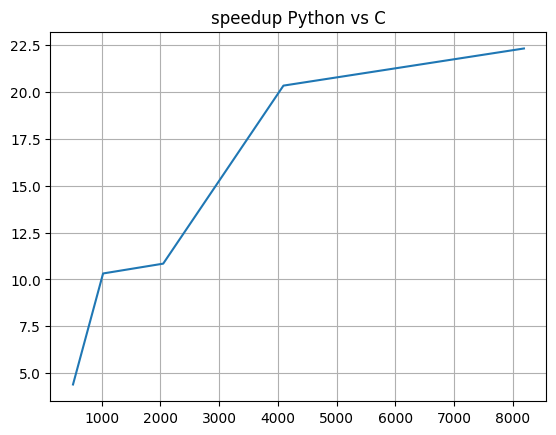

In [9]:
import matplotlib.pyplot as plt

speedup = np.asarray(lstMP)/np.asarray(lstMC)
plt.plot(valores, speedup)
plt.grid()
plt.title('speedup Python vs C')
plt.tight_layout